<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Customer Churn Prediction | EDA and Model</p></b></h1>

### Tabel of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="0"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that acquiring a new customer can be up to <span style="color:#DC143C;">five times</span> times more expensive than retaining an existing one?</i></span> </center>

![churn 1.png](https://miro.medium.com/v2/resize:fit:1024/1*TgciopaOk-C8fwtPmmet3w.png)

**Problem Statement:**
In the telecom sector, where customers choose from various providers for communication and internet services, the challenge lies in retaining them. Service quality significantly influences customer perception, with even a brief maintenance break causing anxiety, highlighting our often-overlooked reliance on these services. Coupled with high customer acquisition costs, analyzing churn becomes critical. Churn rate, reflecting customer subscription cancellations, directly impacts revenue. Insights from churn analysis guide companies in formulating targeted strategies, improving service quality, and cultivating customer trust. Building predictive models and generating comprehensive churn analysis reports are imperative for sustained business growth.

# Aim :
The objective is to categorize potential churn customers by leveraging both numerical and categorical features. This entails addressing a binary classification problem within the framework of a dataset exhibiting imbalances.

## Dataset Attributes

The [dataset](https://github.com/MuhammadUmerKhan/Customer-Churn-Prediction-with-NLP-Insights/blob/main/Datasets/Telecom%20chustomer%20churn%20dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv) encompasses diverse attributes providing valuable insights into customer details and interactions. Customer-specific details include a unique identifier (**customerID**), gender information, and a binary indicator denoting whether the customer is a senior citizen (**SeniorCitizen**).

Additional attributes capture relational aspects, such as whether the customer has a partner (**Partner**) and dependents (**Dependents**). The **tenure** attribute signifies the duration, in months, for which the customer has been associated with the company.

Communication services are represented by attributes like **PhoneService** and **MultipleLines**, indicating the presence of phone service and whether the customer has multiple lines. Internet-related features encompass the **InternetService** provider, online security (**OnlineSecurity**), online backup (**OnlineBackup**), device protection (**DeviceProtection**), and tech support (**TechSupport**).

Entertainment services are reflected in attributes like streaming TV (**StreamingTV**) and streaming movies (**StreamingMovies**). The **Contract** attribute reveals the duration of the customer's contract, with options such as month-to-month, one year, and two years.

Billing preferences are outlined through the **PaperlessBilling** attribute, indicating whether the customer opts for paperless billing. The **PaymentMethod** attribute specifies how customers choose to pay, with options like electronic check, mailed check, bank transfer (automatic), and credit card (automatic).

Financial details include the **MonthlyCharges** the customer incurs on a monthly basis and the overall **TotalCharges** accumulated.

Lastly, the critical attribute of **Churn** denotes whether the customer has churned, serving as a crucial factor in understanding customer retention dynamics.

**<a id="1"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>

In [313]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
from textblob import TextBlob
import joblib

import nltk
import spacy

import warnings 
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# nltk.download('all')

**<a id="1"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Algorithm Function</p></b></h1>

In [314]:
def Algorithm(model=None, X_train=None, X_test=None, y_train=None, y_test=None, params=None, save = False, name = None):
    gridsearch = GridSearchCV(model, param_grid=params, scoring='f1', cv=5)
    gridsearch.fit(X_train, y_train)
    
    best_model = gridsearch.best_estimator_
    best_params = gridsearch.best_params_

    if save:
        joblib.dump(best_model, f'{name}.joblib')
    
    y_scores = best_model.predict_proba(X_test)[:, 1]
    predictions = best_model.predict(X_test)
    
    print(f"Model Accuracy: {best_model.score(X_test, y_test) * 100:.2f}%")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_scores) * 100:.2f}%")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return model_evaluation(model=best_model, X_test=X_test, y_test=y_test), best_params

def model_evaluation(model=None, X_test=None, y_test=None):
    plt.figure(figsize=(4, 3))
    
    cm = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', cbar=False)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.show()

    print("-----------------------------------")
    print(classification_report(y_true=y_test, y_pred=model.predict(X_test)))


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 1: Pick a Single, Comprehensive Dataset
</p></b></h1>

In [315]:
churn_data = pd.read_csv("../Datasets/Telecom chustomer churn dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2: Perform Structured Data Analysis for Churn Prediction
</p></b></h1>

In [316]:
churn_data.shape

(7043, 21)

Dataset Consist of 7043 entries and 21 columns

In [317]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the data!

In [318]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [319]:
churn_data.drop(columns='customerID', inplace=True)

In [320]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The dataset exhibits numerous features with text data, most likely representing categorical features. Notably, the **Total Charges** feature contains numerical values but is currently stored as a string datatype. As a first step, we will convert the entries in this column into floating-point numbers for further analysis.

In [321]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(' ', np.nan).astype(float)

In [322]:
churn_data = churn_data[churn_data['TotalCharges'] != ' ']

During the conversion of the **TotalCharges** column to float, an error was encountered due to the presence of empty strings, preventing the direct conversion of string to float.

The issue arises because, though these elements were defined as strings, they did not appear as null values, and consequently, the missing values did not display anything. An example of this is a string variable defined as `a = ' '`. 

In [323]:
churn_data.drop_duplicates(inplace=True)

In [324]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.0000,0.000,0.0000,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


We will categorize the features into two groups: numerical and categorical. Additionally, we will perform label encoding transformations for the categorical features to facilitate further analysis.

In [325]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

churn_data = churn_data.copy(deep = True)
text_data_features = [i for i in list(churn_data.columns) if i not in list(churn_data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    churn_data[i] = le.fit_transform(churn_data[i])
    print(i,' : ',churn_data[i].unique(),' = ',le.inverse_transform(churn_data[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


**<a id="3"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Exploratory Data Analysis (EDA)</p></b></h1>

In [326]:
#Dividing features into Numerical and Categorical :

col = list(churn_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(churn_data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


We will generate a deep copy of the original dataset to ensure that modifications made during label encoding do not affect the original dataset. This deep copy will serve as a version with all features converted into numerical values, facilitating visualization and modeling.

Subsequently, we will recompute the descriptive statistics of the data to provide a comprehensive overview of the transformed dataset.

## Churn Target Variable Visualization

Understanding the distribution of the target variable, "Churn," is crucial for gaining insights into customer behavior. In this visualization:

- **Churn Distribution:** We explore the distribution of churned and not-churned customers to gauge the imbalance in the dataset.

- **Visual Representation:** Utilizing graphs or charts to present a clear and concise overview of the proportion of customers who churned and those who did not.

- **Insights:** Analyzing patterns in churn distribution can reveal potential challenges and opportunities in addressing customer retention.

This visualization serves as a foundational step in comprehending the dataset's target variable, setting the stage for more in-depth analyses and modeling.

In [327]:
#Dividing features into Numerical and Categorical :

col = list(churn_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(churn_data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


    In the context of this analysis, features are classified as categorical if they have less than 6 unique elements; otherwise, they are considered numerical. While an alternative approach is to use the datatype of the elements (e.g., integer for numerical and string for categorical), given the dataset's manageable size, a manual check is also feasible.

    This dual approach ensures a robust classification of features into numerical and categorical, facilitating a comprehensive understanding of their nature and aiding subsequent analytical steps.

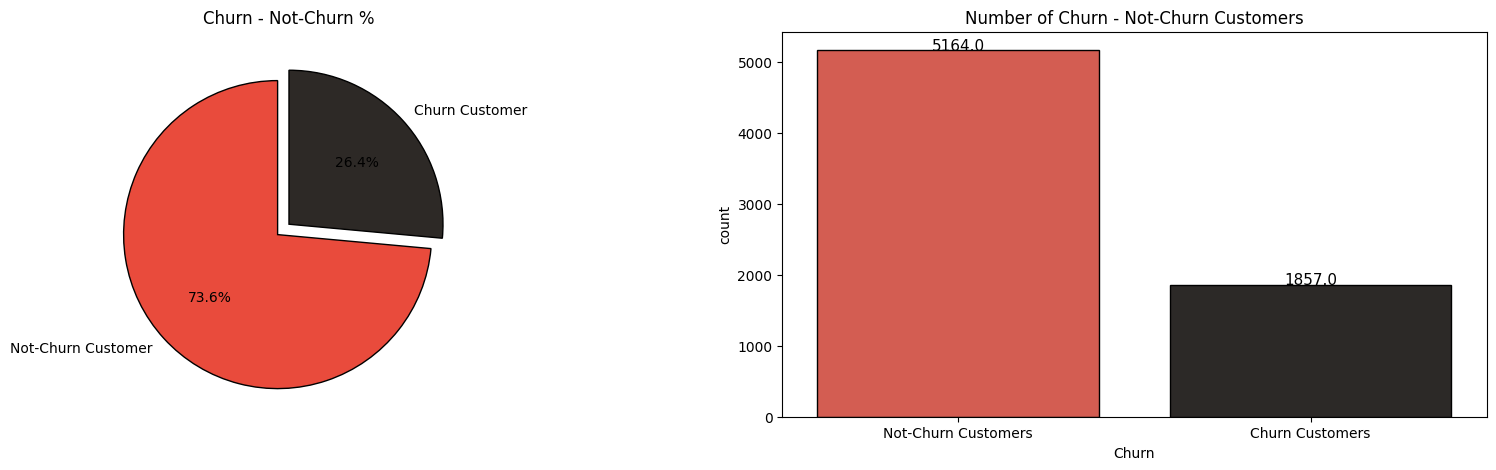

In [328]:
colors = ['#E94B3C','#2D2926']
# Assuming 'Churn' is a categorical variable with values 'Yes' and 'No'

l = list(churn_data['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
axes[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
            colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Churn - Not-Churn %')

# Countplot
ax = sns.countplot(x='Churn', data=churn_data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

ax.set_title('Number of Churn - Not-Churn Customers')

plt.show()

    The dataset exhibits an imbalanced distribution, with a ratio of approximately 3:1 for Not-Churn to Churn customers. This imbalance introduces a bias in predictions, where the model may lean towards accurately predicting Not-Churn instances.

    Visualizations will vividly illustrate this disparity, emphasizing the challenge posed by the skewed distribution in the dataset. Addressing this class imbalance will be a crucial consideration in subsequent modeling steps to ensure a more accurate and meaningful predictive outcome.

## Categorical Features and Their Impact on the Target Variable (Churn)

In [329]:
categorical_features.remove('Churn')

    To manage the abundance of categorical features in the dataset, we classify them into three groups based on their values or column names. This categorization aids in organizing and analyzing the features more effectively, allowing for a structured exploration of their impact on the target variable.

In [330]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

    To manage the abundance of categorical features in the dataset, we classify them into three groups based on their values or column names. This categorization aids in organizing and analyzing the features more effectively, allowing for a structured exploration of their impact on the target variable.

## Group 1: Customer Information

This category encompasses attributes related to customer demographics and characteristics:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

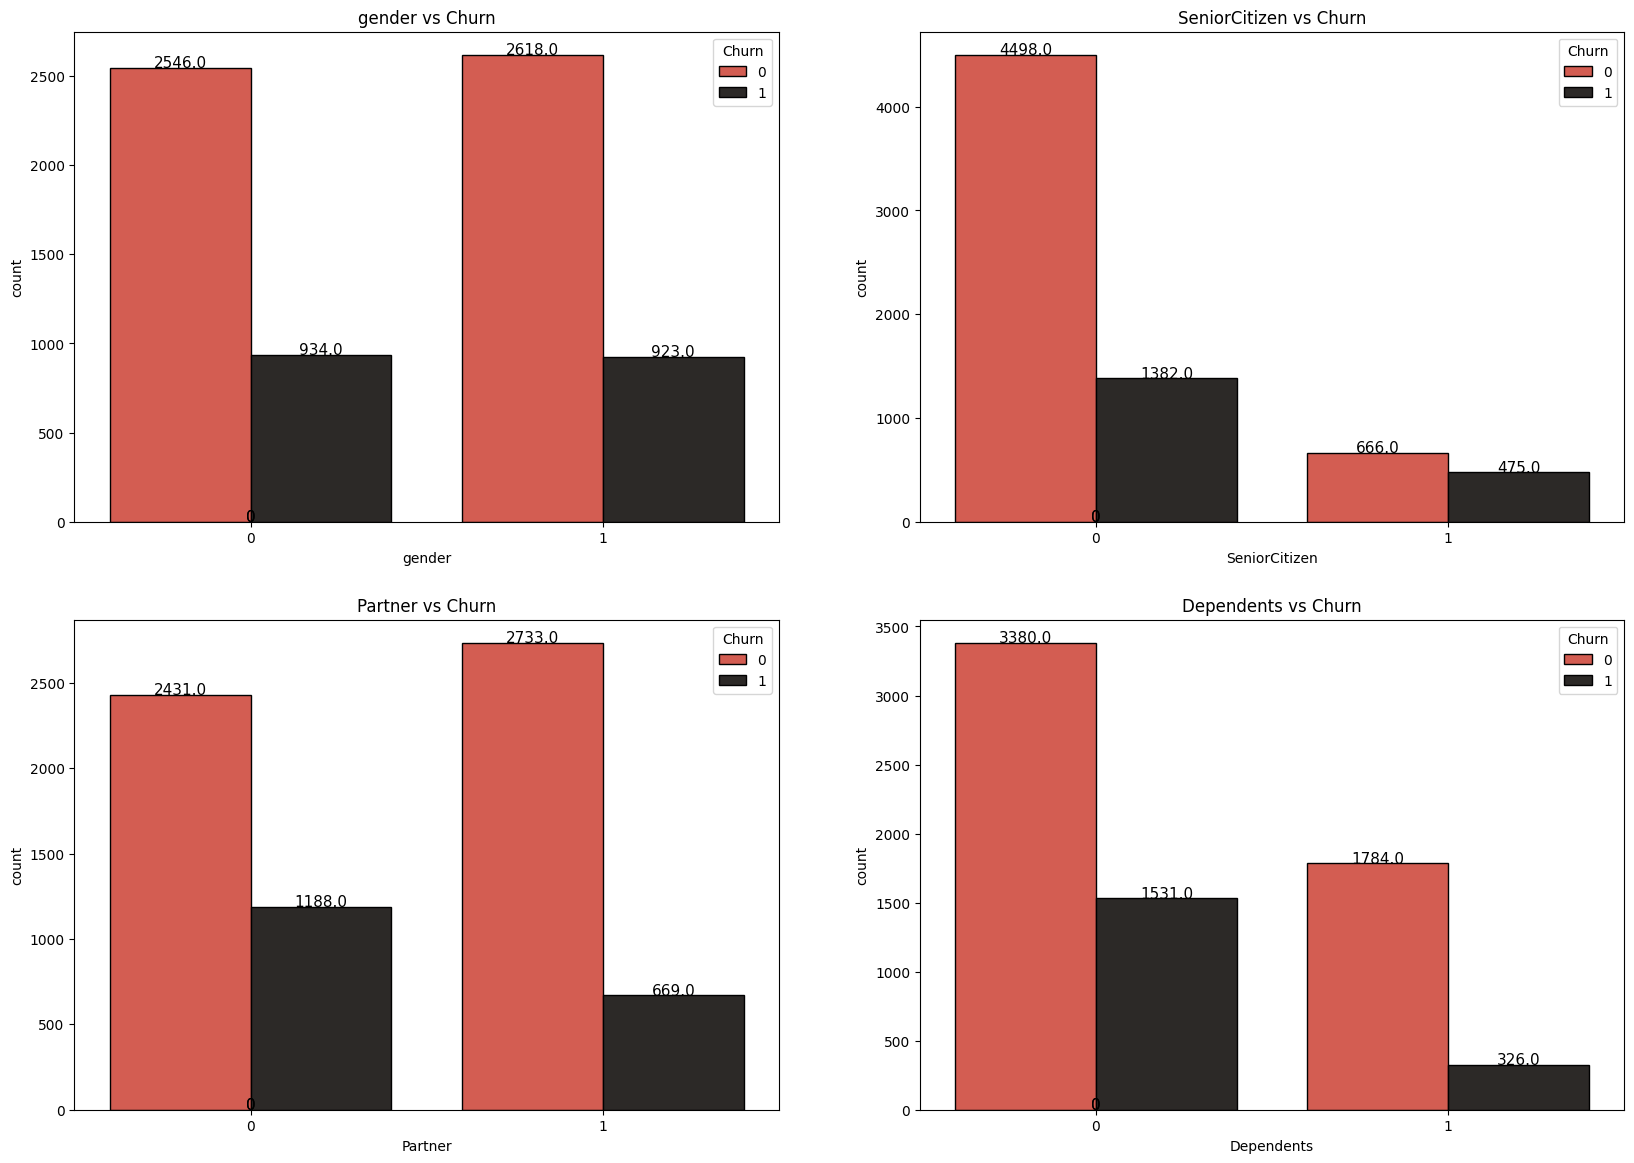

In [331]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

- **Gender Churn Analysis:**
  Customer churn rates are comparable between male and female customers, indicating similarity in churn behavior across genders.

- **SeniorCitizen Analysis:**
  The number of SeniorCitizen customers is relatively low. However, among SeniorCitizens, approximately 40% experienced churn, accounting for 476 out of 1142 Senior Citizen customers.

- **Partner Status Impact:**
  Customers residing with a partner exhibit lower churn rates compared to those without a partner.

- **Dependents Influence:**
  Churn rates are higher for customers without dependents, suggesting a potential correlation between familial status and customer retention.

    These observations provide insights into specific customer segments that may require targeted retention strategies. Understanding the nuanced behavior within these groups can aid in developing more tailored approaches for customer retention.

## Group 2: Customer-Enlisted Services
For visualization purposes, we'll categorize features related to services subscribed by the customer into two groups:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This segmentation allows for a focused examination of customer behavior in terms of the services they have subscribed to, aiding in the identification of patterns and trends within these service-related attributes.

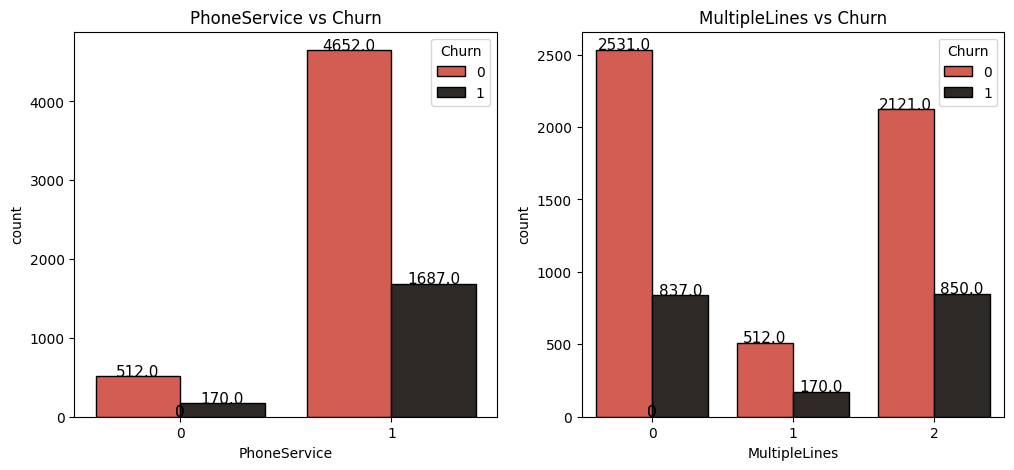

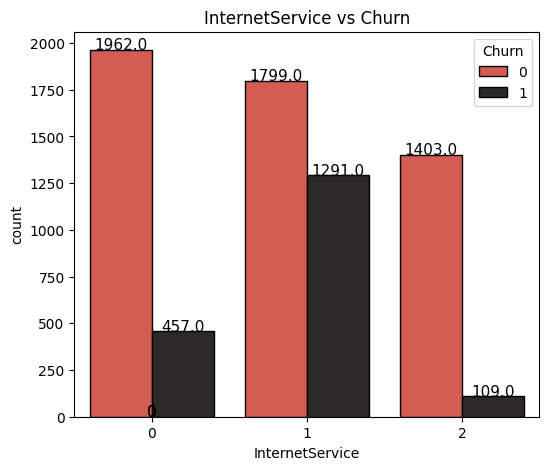

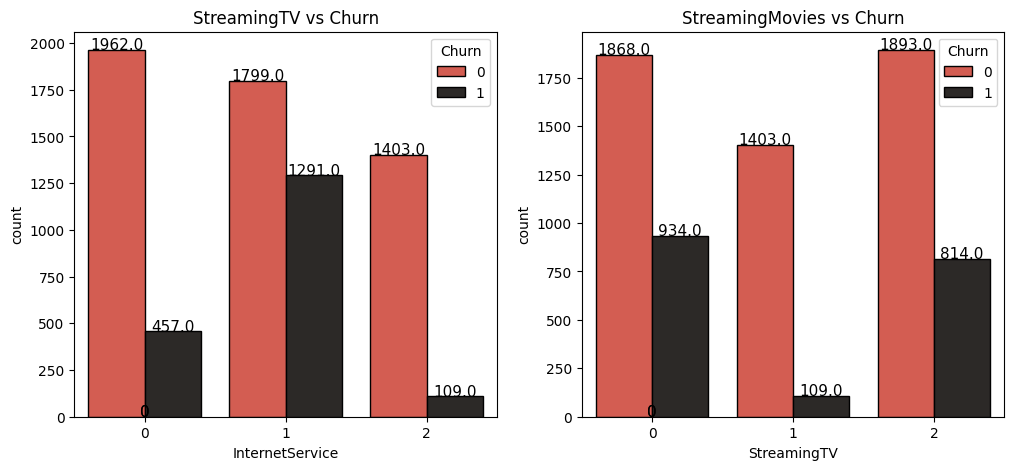

In [332]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 2],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title)

- **PhoneService Analysis:**
  Notably, a higher retention rate is observed among customers with no phone service compared to those who opted to discontinue the service.

- **MultipleLines Impact:**
  The churn rate appears consistent irrespective of whether customers have subscribed to multiple lines or not.

- **InternetService Preferences:**
  A considerable number of customers exhibit a preference against utilizing Fiber optic cables for InternetService. Conversely, the data suggests a greater inclination towards DSL among customers.

- **Insights on Streaming Services:**
  Both StreamingTV and StreamingMovies exhibit parallel churn patterns. Regardless of subscription status, a noteworthy number of customers have experienced churn. This implies that factors beyond streaming content alone contribute to customer disengagement.

These observations shed light on customer behavior concerning the services they avail, offering valuable insights for devising targeted strategies to enhance customer retention.

### Group 2: Customer-Enlisted Services

This category comprises features related to security and support services subscribed by the customer:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

Exploring these attributes will provide insights into how customers engage with security and support services, guiding the development of strategies to enhance customer satisfaction and retention.

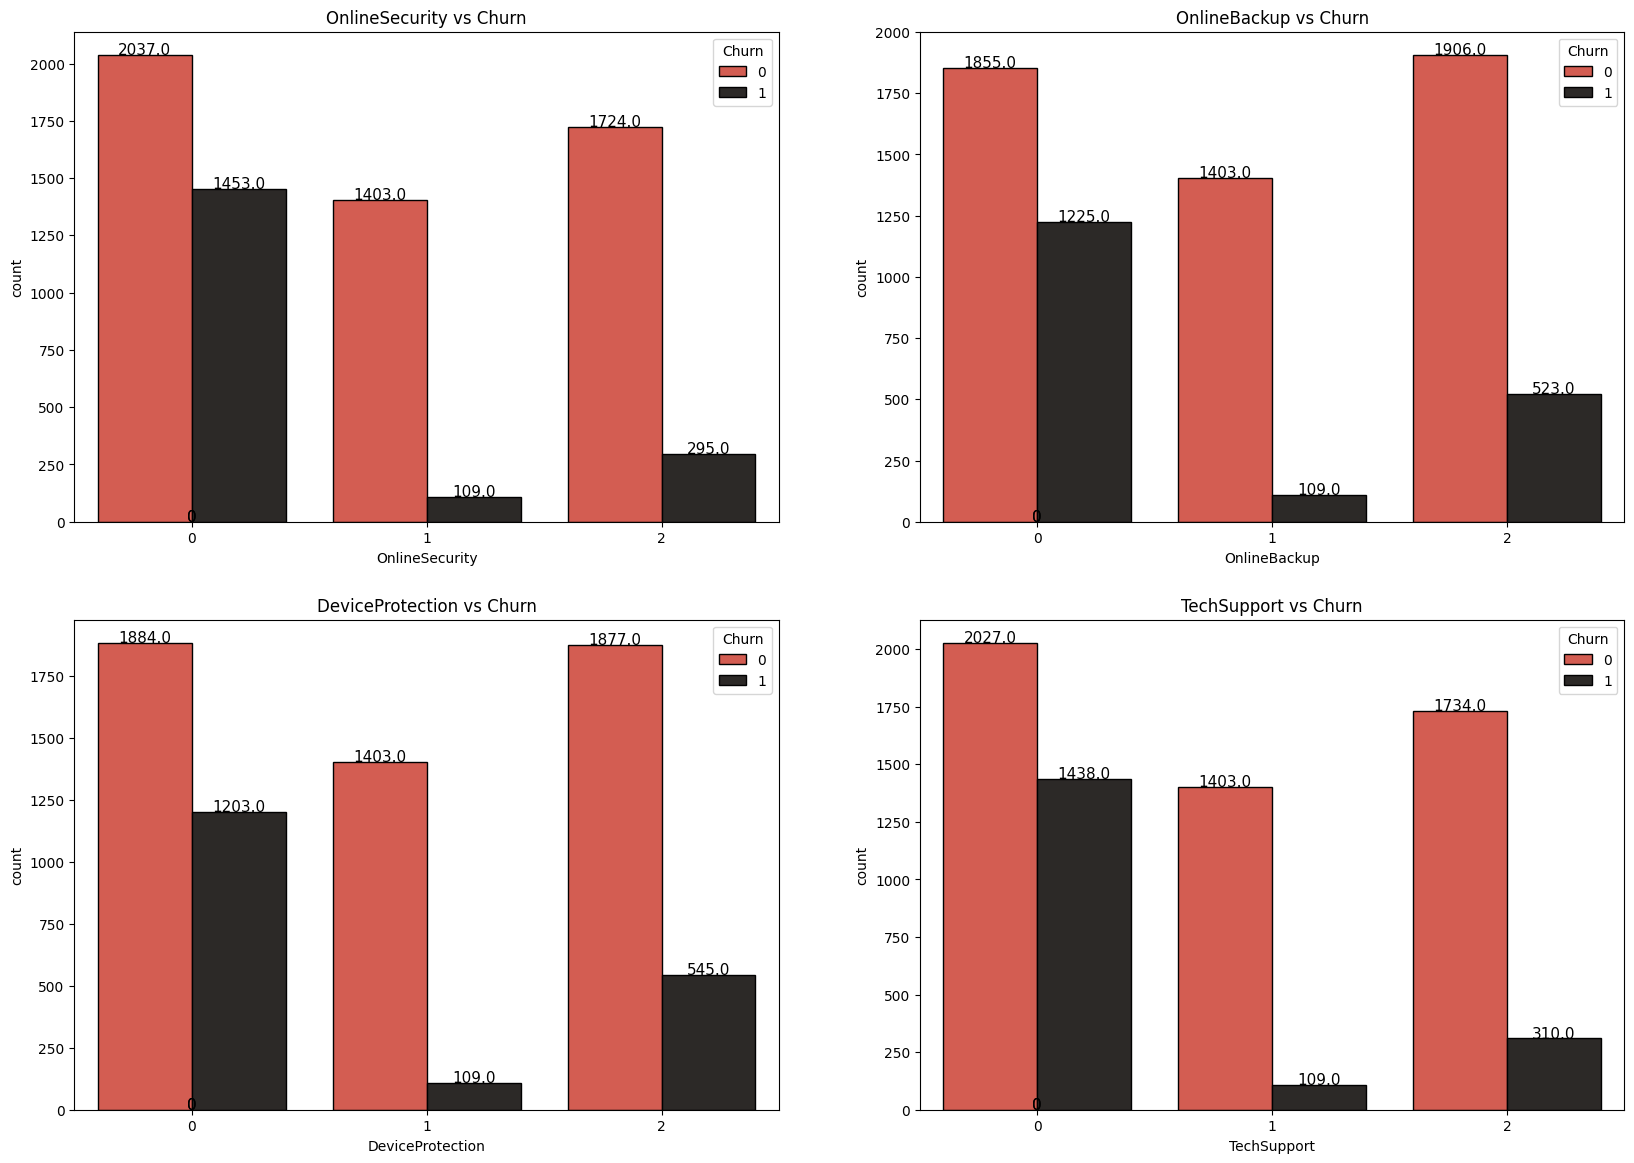

In [333]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

The visualizations indicate the critical importance of services related to OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in retaining customers. A notable number of customers have opted to switch service providers, emphasizing the significance of providing robust and satisfactory services in these areas. These findings underscore the need for focused efforts in improving and promoting these services to enhance overall customer satisfaction and retention.

### Group 3

This group encompasses features related to contractual terms, billing preferences, and payment methods:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes will provide insights into customer preferences regarding contractual commitments, billing processes, and payment methods, guiding strategies for optimizing customer satisfaction and retention.

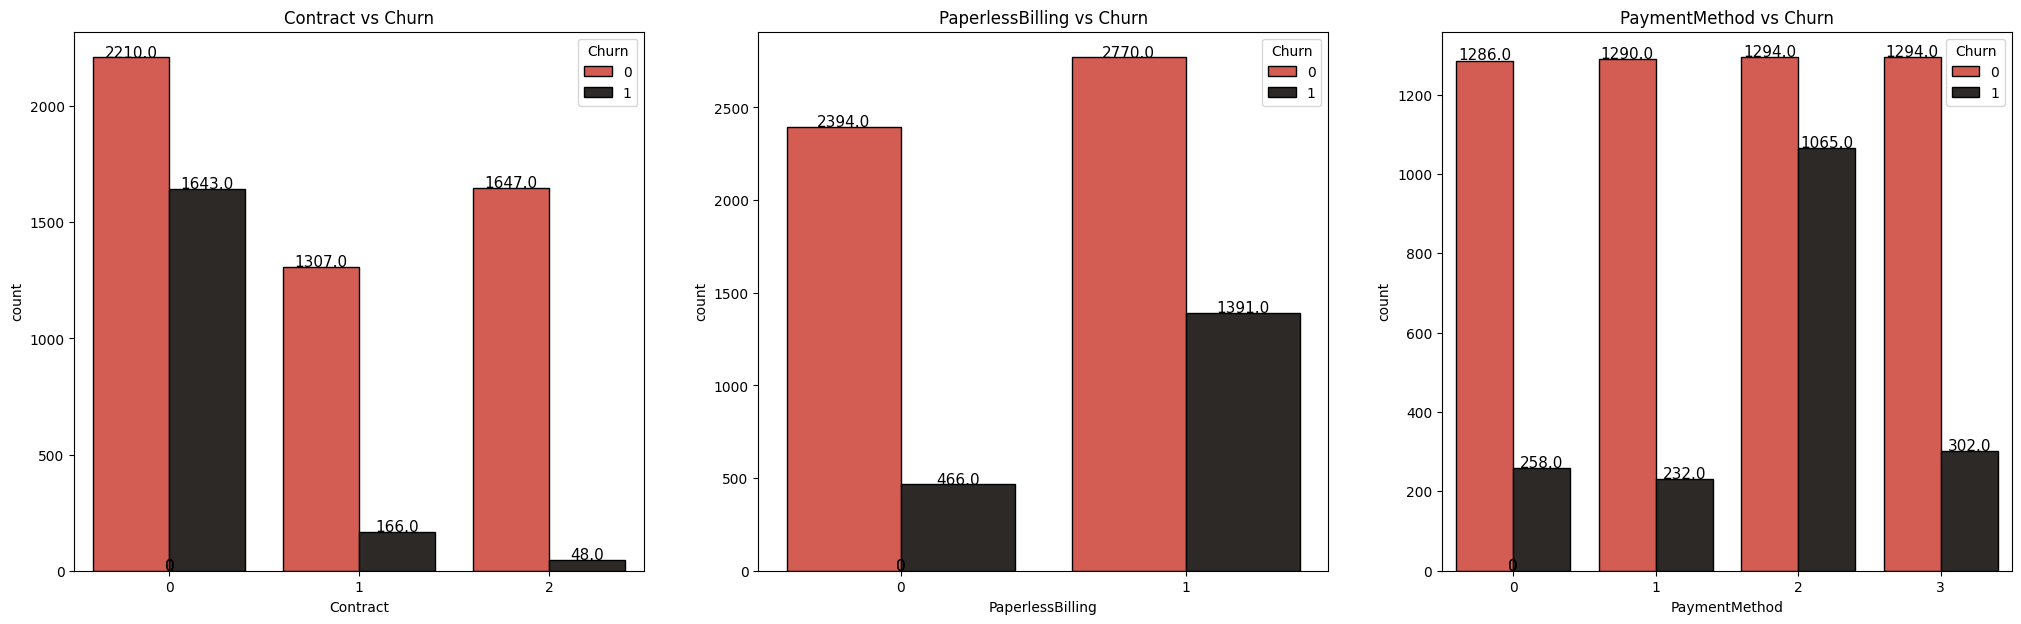

In [334]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = churn_data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- **Contract Analysis:**
  Customer churn is notably high for Month-to-Month contracts. This could be attributed to customers testing various services and opting for shorter-term commitments to explore available options or save costs.

- **PaperlessBilling Impact:**
  A considerable number of customers experience churn in the presence of PaperlessBilling, suggesting potential issues related to payment or receipt processes.

- **PaymentMethod Insights:**
  Customers exhibit a strong aversion to the Electronic check payment method. Of the 2365 bills paid using Electronic check, a significant 1071 customers chose to discontinue services. Addressing issues with Electronic check or reconsidering its inclusion may be necessary for improved customer satisfaction.

These observations underscore the importance of understanding customer preferences in contractual terms, billing methods, and payment processes. Implementing measures to address specific pain points can contribute significantly to customer retention efforts.

### Analysis of Categorical Features in Relation to Churn Cases

This investigation centers on examining the impact of categorical features specifically concerning customers who have experienced churn. The goal is to discern patterns, correlations, and influential factors among these categorical features within the context of churn cases. The findings from this analysis will provide valuable insights for optimizing strategies aimed at customer retention.


### Group 1: Customer Information

In this grouping, we explore the relationship between customer information and churn cases, focusing on the following categorical features:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

This analysis aims to uncover patterns and associations within these specific customer attributes concerning instances of customer churn.

In [335]:
gender = churn_data[churn_data['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = churn_data[churn_data['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = churn_data[churn_data['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = churn_data[churn_data['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

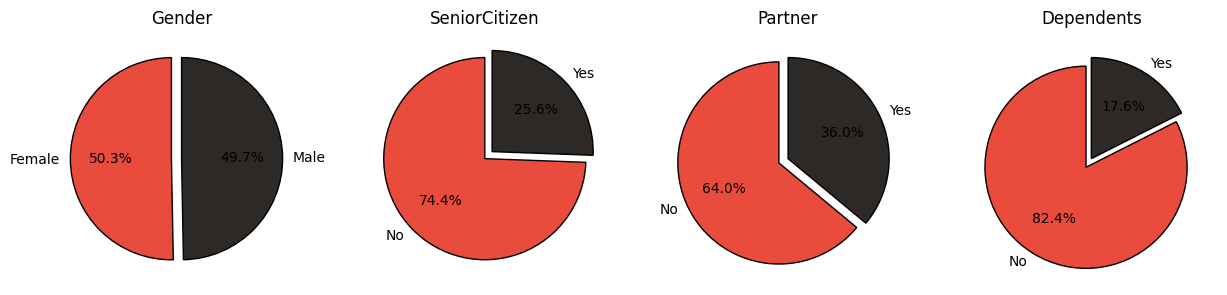

In [336]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

### Group 2: Customer-Enlisted Services

In this grouping, we investigate the relationship between services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This analysis aims to uncover patterns and correlations within these specific service-related attributes concerning cases of customer churn.

In [337]:
phoneservice = churn_data[churn_data['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = churn_data[churn_data['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = churn_data[churn_data['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = churn_data[churn_data['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = churn_data[churn_data['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

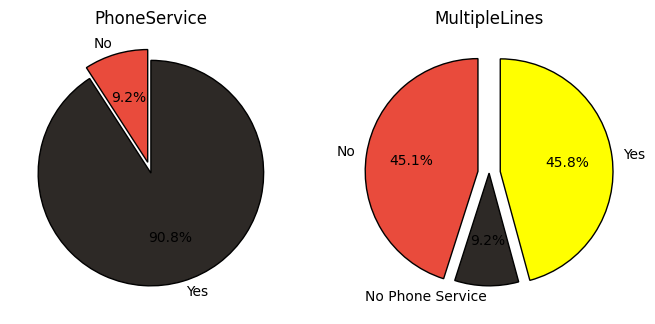

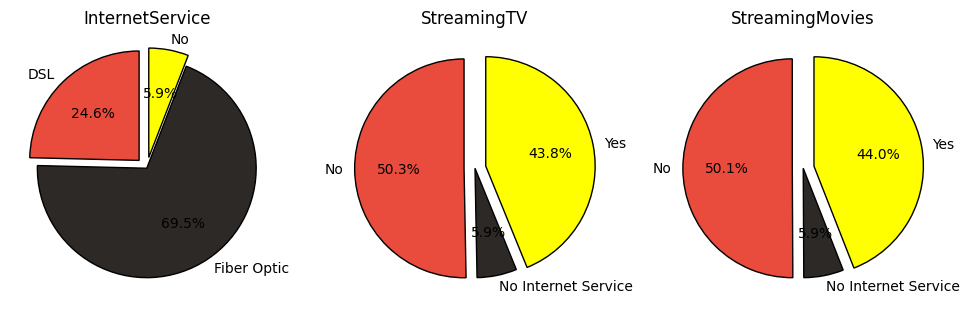

In [338]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');


- **PhoneService Impact:**
  Despite the provision of PhoneService, a significant percentage of customers switched, suggesting dissatisfaction or other service-related issues.

- **MultipleLines Influence:**
  The availability of MultipleLines did not significantly affect customer unsubscription, indicating its limited impact on churn.

- **InternetService Preferences:**
  A notable 70% of customers opted out from services involving Fiber Optic cables for InternetService, signaling a strong preference against this technology.

- **Streaming Services Insights:**
  While customers without StreamingTV and StreamingMovies services tended to cancel their subscriptions, an average of 43.7% of customers with these services switched. This suggests that other factors beyond streaming content contribute to customer churn.

### Group 2: Customer-Enlisted Services
In this grouping, we investigate the relationship between security and support services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

This analysis aims to uncover patterns and correlations within these specific security and support service-related attributes concerning cases of customer churn.

In [339]:
onlinesecurity = churn_data[churn_data['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = churn_data[churn_data['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = churn_data[churn_data['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = churn_data[churn_data['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

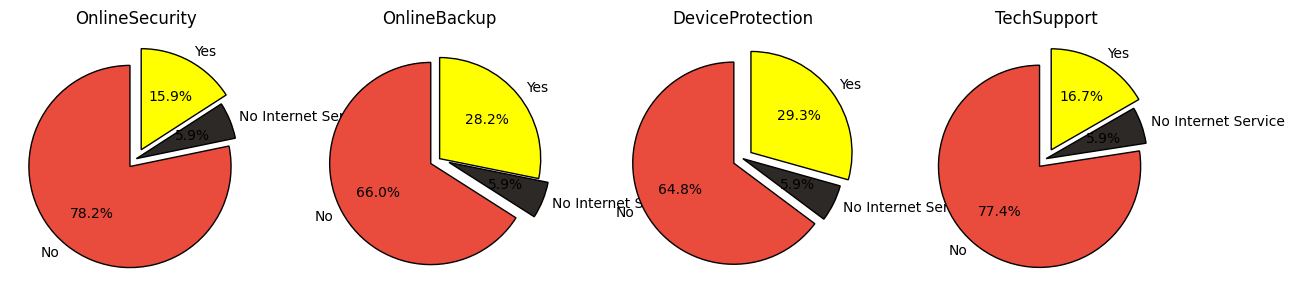

In [340]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

The pie charts above underscore the critical importance of providing OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport services. On average, a substantial 71.6% of customers terminated their services due to the absence of these essential features. This highlights a clear correlation between the provision of robust security and support services and customer retention, emphasizing the need for strategic enhancements in these areas.

### Group 3

This grouping delves into the relationship between contract terms, billing preferences, and payment methods selected by the customer, specifically in the context of instances of churn. The categorical features under scrutiny are:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes aims to reveal patterns and correlations within these specific contractual and financial service-related features concerning cases of customer churn.

In [341]:
contract = churn_data[churn_data['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = churn_data[churn_data['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = churn_data[churn_data['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

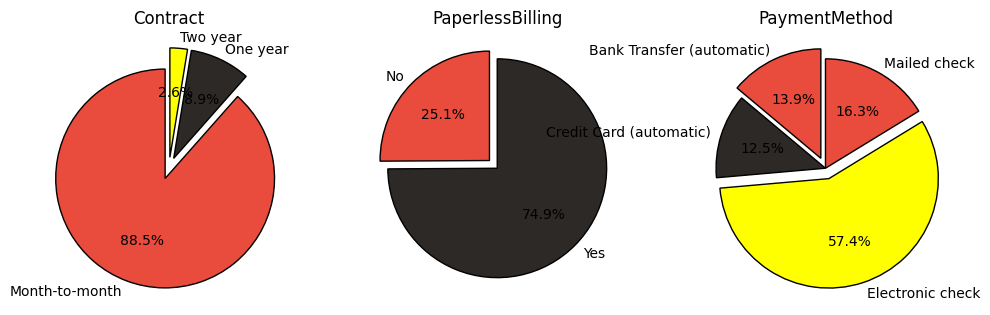

In [342]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');


- **Contract Duration Impact:**
  Monthly contracts dominate customer churn, with a substantial 88.6% share. This highlights the need to explore alternatives or incentives for longer-term commitments.

- **PaperlessBilling Analysis:**
  PaperlessBilling does not garner positive sentiment among customers, evident from the significant churn associated with this billing method.

- **PaymentMethod Insights:**
  Electronic check emerges as a significant concern, contributing to 57.3% of churn. Addressing issues with this payment method is crucial. Mailed check, Bank Transfer (automatic), and Credit Card (automatic) follow, necessitating attention to improve the overall payment experience for customers.

These findings provide actionable insights for refining contract terms, billing preferences, and payment methods to enhance customer satisfaction and retention.

## Numerical Features Distribution
In this analysis, we explore the distribution of numerical features to gain insights into the spread and characteristics of quantitative attributes in the dataset.

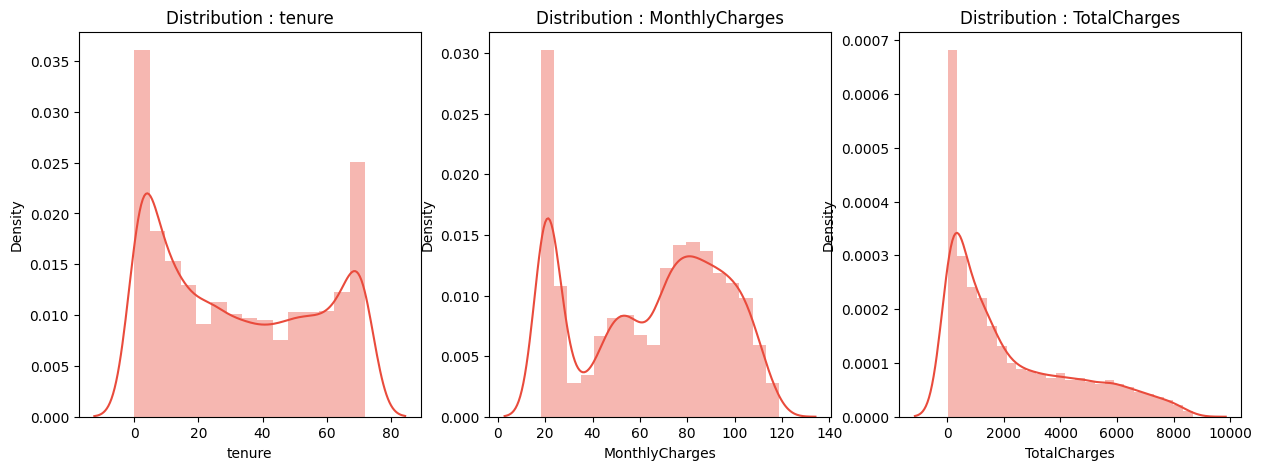

In [343]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(churn_data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **Tenure Distribution:**
  The tenure distribution exhibits a bimodal pattern with peaks at 0-70, indicating the presence of two distinct groups within the customer base.

- **MonthlyCharges Distribution:**
  MonthlyCharges create a bimodal distribution with peaks at 20-80, suggesting the existence of two prevalent cost structures or service tiers.

- **TotalCharges Distribution:**
  TotalCharges displays a positively or rightly skewed distribution, indicating a concentration of lower values with a gradual tapering towards higher values.

These numerical feature distributions provide valuable insights into the varied patterns within customer tenure, monthly charges, and total charges. Understanding these distributions aids in refining strategies for customer segmentation and engagement.

## Target Variable (Outcome) in Relation to Numerical Features

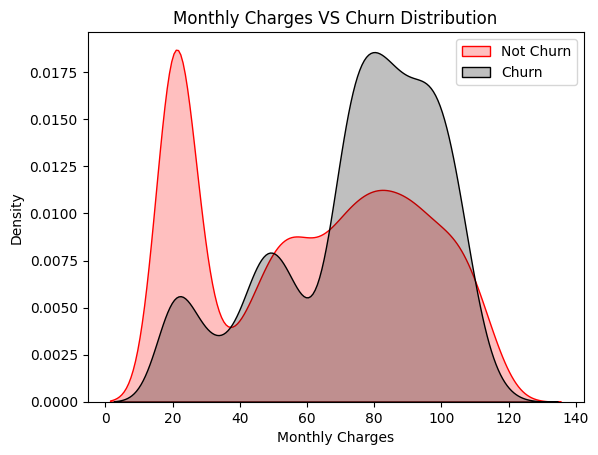

In [344]:
ax = sns.kdeplot(churn_data.MonthlyCharges[(churn_data["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(churn_data.MonthlyCharges[(churn_data["Churn"] == 1) ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

Customers are more likely to churn due to the presence of high monthly charges.

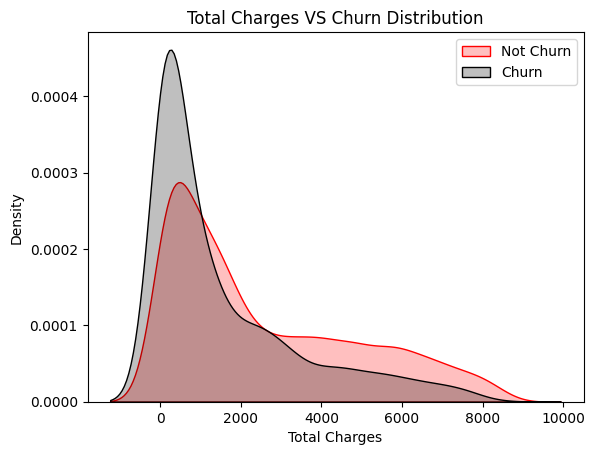

In [345]:
ax = sns.kdeplot(churn_data.TotalCharges[(churn_data["Churn"] == 0) ],
                color="red", shade = True);
ax = sns.kdeplot(churn_data.TotalCharges[(churn_data["Churn"] == 1) ],
                ax =ax, color="black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

The observation that high Total Charges are associated with a higher likelihood of customer churn suggests a potential issue with the pricing system. Addressing and optimizing the pricing structure is crucial to mitigate this factor contributing to customer churn. A thorough examination and potential adjustments in pricing strategies may help enhance customer satisfaction and retention.

# Overview of Exploratory Data Analysis

In customer churn analysis, certain categorical features reveal distinct hierarchies crucial for targeted retention strategies. **Male** customers are more likely to churn than females, while **SeniorCitizens** exhibit lower churn rates. Not having a **partner** or **dependents** increases churn likelihood. Regarding services, having **phone service** and **multiple lines** correlates with lower churn, and **fiber optic** internet users are more prone to churn than DSL users. The absence of online security, online backup, etc., indicates higher churn.

Contract-wise, **month-to-month** contracts show higher churn than one-year and two-year contracts. **PaperlessBilling** customers are more likely to churn. In payment methods, **electronic checks** users have a higher churn risk, followed by mailed checks, bank transfers (automatic), and credit cards (automatic). Understanding these hierarchies is essential for devising effective retention strategies.

## Visualizing Correlation Matrix:

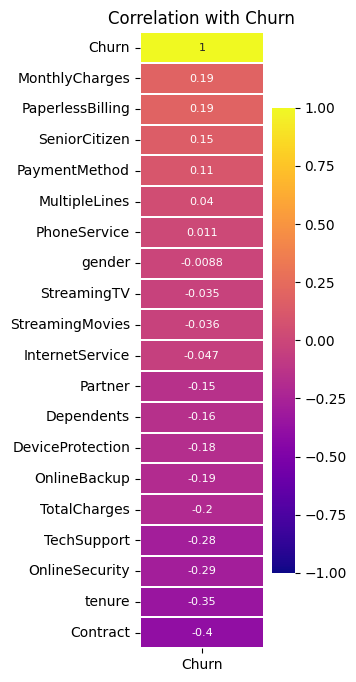

In [346]:
churn_corr = churn_data.corr()[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(2, 8))
sns.heatmap(churn_corr, vmax=1, vmin=-1, cmap='plasma', annot=True, annot_kws={"size": 8}, linewidths=0.1)
plt.title("Correlation with Churn")
plt.show()

## Correlation Analysis Results:

Upon scrutinizing the correlation matrix, it is evident that "MulipleLines," "PhoneService," "gender," "StreamingTV," "StreamingMovies," and "InternetService" exhibit negligible correlation coefficients. As a strategic decision, these features are deemed non-contributory and are slated for removal.

Conversely, the remaining features showcase noteworthy correlation patterns, either positively or negatively. This discernment guides our feature selection strategy, emphasizing those variables that exhibit meaningful correlations in further analyses.

# Filling missing values

In [347]:
churn_data['TotalCharges'].fillna(value=churn_data['TotalCharges'].mean(), inplace=True)

# Feature Selection

In [348]:
X = churn_data.drop(columns=['Churn', 'OnlineBackup', 'DeviceProtection', 'InternetService', 'gender', 'PhoneService', 'MultipleLines', 'StreamingMovies', 'StreamingTV'])
y = churn_data['Churn']

## Addressing Data Imbalance with SMOTENN:

In [349]:
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

## Addressing Data Leakage:

Data Leakage poses a significant challenge when external information beyond the training dataset influences model creation—an issue often overlooked.

To foster the development of robust models, mitigating data leakage becomes imperative. The prevalent occurrence of overly optimistic models, rendered practically useless for production, underscores the urgency of this matter.

To safeguard against Data Leakage, a prudent approach involves employing a train-test-split prior to any transformations. This ensures that transformations are applied based on the training data, maintaining integrity for both training and test datasets.

In [350]:
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_resampled, y_resampled,test_size=0.2)

## Data Scaling for Machine Learning Models:

In [351]:
mms = MinMaxScaler()  # Min-Max Scaling

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train_en[columns_to_scale] = mms.fit_transform(X_train_en[columns_to_scale])
X_test_en[columns_to_scale] = mms.transform(X_test_en[columns_to_scale])

# Save the Trained Model and Scaler: 
- Use joblib (or pickle) to save your trained model and scaler for later use in your web application.

In [352]:
joblib.dump(mms, 'minmax_scaler_for_churn_prediction.joblib')

['minmax_scaler_for_churn_prediction.joblib']

**<a id="2"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>

## LogisticRegression Classifier :

Model Accuracy: 92.04%
ROC AUC Score: 97.04%


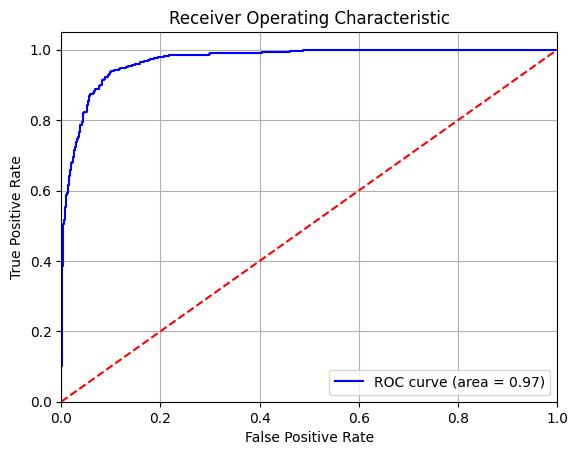

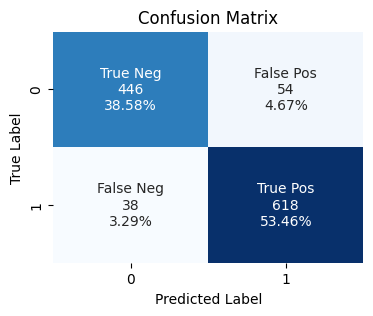

-----------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       500
           1       0.92      0.94      0.93       656

    accuracy                           0.92      1156
   macro avg       0.92      0.92      0.92      1156
weighted avg       0.92      0.92      0.92      1156

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [353]:
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
logistic_evaluation, best_logistic_params = Algorithm(
    model=LogisticRegression(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=logistic_params
)

print("Best Parameters:", best_logistic_params)


## Decision Tree Classifier :
Decision-Making Precision: Unraveling Patterns with Decision Tree Classification

Model Accuracy: 92.39%
ROC AUC Score: 92.27%


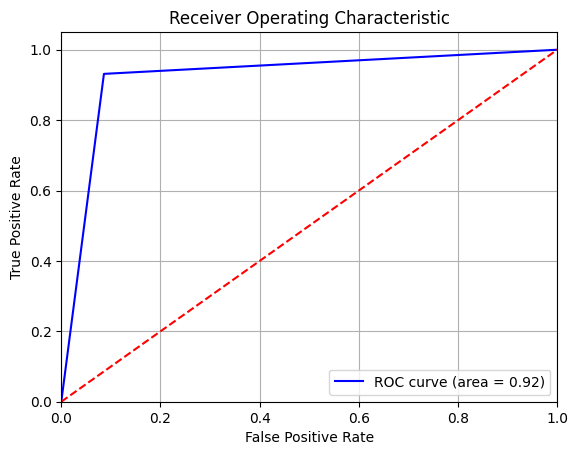

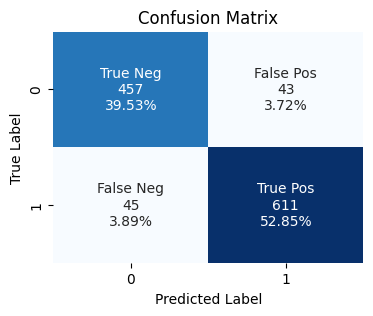

-----------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       500
           1       0.93      0.93      0.93       656

    accuracy                           0.92      1156
   macro avg       0.92      0.92      0.92      1156
weighted avg       0.92      0.92      0.92      1156

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [354]:
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

decision_tree_evaluation, best_decision_tree_params = Algorithm(
    model=DecisionTreeClassifier(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=decision_tree_params
)

print("Best Parameters:", best_decision_tree_params)


# Random Forest Classifier

Model Accuracy: 94.29%
ROC AUC Score: 98.71%


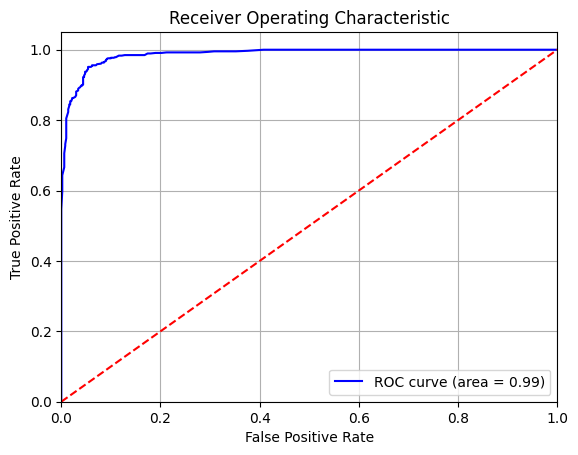

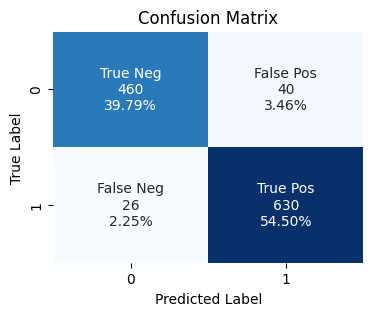

-----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       500
           1       0.94      0.96      0.95       656

    accuracy                           0.94      1156
   macro avg       0.94      0.94      0.94      1156
weighted avg       0.94      0.94      0.94      1156

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


In [355]:
random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
}

random_forest_evaluation, best_random_forest_params = Algorithm(
    model=RandomForestClassifier(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=random_forest_params, save = True, name="Churn_Feature_Classifier")

print("Best Parameters:", best_random_forest_params)


# K Nearest Neighbours Classifier

Model Accuracy: 90.40%
ROC AUC Score: 96.62%


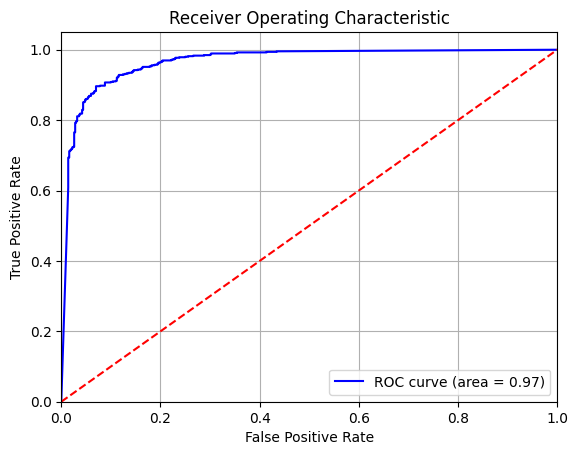

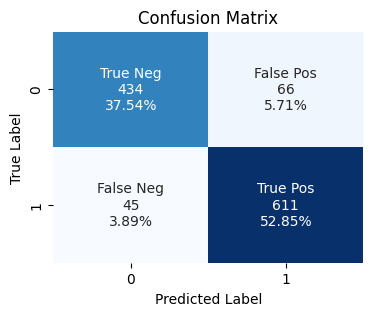

-----------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       500
           1       0.90      0.93      0.92       656

    accuracy                           0.90      1156
   macro avg       0.90      0.90      0.90      1156
weighted avg       0.90      0.90      0.90      1156

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [356]:
knn_params = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}
knn_evaluation, best_knn_params = Algorithm(
    model=KNeighborsClassifier(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=knn_params
)

print("Best Parameters:", best_knn_params)


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3: Add Simulated NLP Features
</p></b></h1>

In [357]:
positive_feedback_samples = [
    "Happy with the consistent service over the years.",
    "Tech support was very helpful when I needed assistance.",
    "Online security features have given me peace of mind.",
    "I appreciate the flexible contract options.",
    "Billing is seamless with paperless billing.",
    "Enjoying affordable rates and stable monthly charges.",
    "Great service with no interruptions during my tenure.",
    "Partnered plan has been cost-effective and reliable.",
    "Dependents also use the service with no issues.",
    "Satisfied with the support offered by tech specialists.",
    "Good monthly rates and easy-to-understand billing.",
    "Online security features meet my needs well.",
    "Easy setup and reliable network with no drops.",
    "Flexible contract terms suit my needs perfectly.",
    "Tech support has been quick and effective every time.",
    "Clear billing process with no surprise charges.",
    "Tenure discounts made staying with this provider easy.",
    "The partner-friendly plans fit our budget well.",
    "Online security features keep my data safe.",
    "Smooth billing system with paperless convenience.",
    "Great experience with minimal downtime.",
    "Monthly charges are reasonable for the service.",
    "Dependents find the network reliable and fast.",
    "Tenure discounts make the service worth it.",
    "Happy with the package offered for my household.",
    "Online security is a great added feature.",
    "Helpful tech support, available when needed.",
    "Partner and dependents also satisfied with the plan.",
    "Reliable monthly charges and no unexpected fees.",
    "Flexible contracts that fit my lifestyle.",
    "The tech support team is quick and professional.",
    "Enjoying good service quality over the years.",
    "Paperless billing is convenient and eco-friendly.",
    "Stable and affordable service throughout my tenure.",
    "The support team made the setup process smooth."
]
negative_feedback_samples = [
    "Frequent billing issues make the service frustrating.",
    "Tech support often fails to resolve issues effectively.",
    "Online security seems inadequate compared to others.",
    "Contract terms feel rigid and hard to adjust.",
    "Paperless billing errors are too common.",
    "Monthly charges have unexpected increases frequently.",
    "Service quality drops significantly during peak hours.",
    "Partnered plan lacks sufficient network stability.",
    "Dependents report frequent service interruptions.",
    "Tech support response times are too slow.",
    "The online security features feel minimal.",
    "The billing system is often confusing and inaccurate.",
    "Frequent outages even after being a long-term customer.",
    "Support team rarely resolves issues in one call.",
    "Contract renewal terms lack flexibility.",
    "Monthly charges feel high for the service provided.",
    "Online security lags compared to competitors.",
    "Billing statements are often unclear or incorrect.",
    "Tenure discounts were not applied as promised.",
    "Dependents face frequent network drops.",
    "Technical support often leaves issues unresolved.",
    "Monthly billing errors are a common occurrence.",
    "Frequent contract changes without notice.",
    "Partnered plan does not seem cost-effective anymore.",
    "Issues with online security features persisting.",
    "Tech support is not helpful during peak times.",
    "Paperless billing fails to capture accurate details.",
    "High charges without any added benefits.",
    "Contract terms do not accommodate long-term customers.",
    "Monthly charges are inconsistent and unpredictable.",
    "Frequent network issues during peak usage.",
    "Partner and dependents also dissatisfied with service.",
    "Tech support rarely resolves issues promptly.",
    "Dependents complain of frequent disconnections."
]

In [358]:
churn_data_new = pd.concat([X, y], axis=1)

In [359]:
np.random.seed(0)  #'Yes':1,'No': 0
churn_data_new['customer_feedback'] = churn_data_new['Churn'].apply(
    lambda x: np.random.choice(negative_feedback_samples) if x == 1 else np.random.choice(positive_feedback_samples)
)

# Data Preparation

In [360]:
nlp = spacy.load("en_core_web_lg")

### Preprocessor 

In [361]:
def preprocess(text):
    doc = nlp(text=str(text))
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(filtered_tokens)

In [362]:
churn_data_new['cleaned_feedback'] = churn_data_new['customer_feedback'].apply(preprocess)

# Sentiment Analysis:
- Once you have clean text, you can perform sentiment analysis to classify the feedback into positive, negative, or neutral sentiments.

In [363]:
churn_data_new['sentiment_score'] = churn_data_new['cleaned_feedback'].apply(lambda txt: TextBlob(txt).sentiment.polarity)

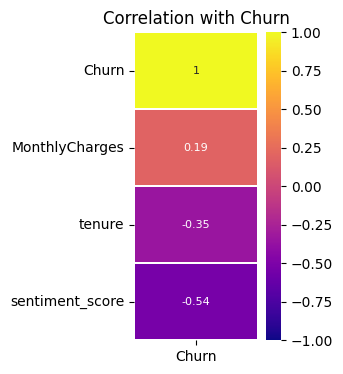

In [364]:
churn_corr = churn_data_new[['sentiment_score', 'tenure', 'MonthlyCharges', 'Churn']].corr()[['Churn']].sort_values(by='Churn', ascending=False)
plt.figure(figsize=(2, 4))
sns.heatmap(churn_corr, vmax=1, vmin=-1, cmap='plasma', annot=True, annot_kws={"size": 8}, linewidths=0.1)
plt.title("Correlation with Churn")
plt.show()

    -The correlation analysis reveals that customer sentiment score has a strong negative correlation with churn, indicating that negative feedback significantly increases the likelihood of customer attrition. Additionally, longer-tenured customers are less likely to churn, while higher monthly charges show a weak positive correlation with churn rates. These insights suggest that improving customer satisfaction, implementing loyalty programs, and evaluating pricing strategies could effectively enhance customer retention.

# Converting text to vector using word vectors

In [365]:
churn_data_new['feedback_vector'] = churn_data_new['cleaned_feedback'].apply(lambda x: nlp(x).vector)

In [366]:
print(churn_data_new['feedback_vector'].apply(type))  # Ensure it's a numpy array

0       <class 'numpy.ndarray'>
1       <class 'numpy.ndarray'>
2       <class 'numpy.ndarray'>
3       <class 'numpy.ndarray'>
4       <class 'numpy.ndarray'>
                 ...           
7038    <class 'numpy.ndarray'>
7039    <class 'numpy.ndarray'>
7040    <class 'numpy.ndarray'>
7041    <class 'numpy.ndarray'>
7042    <class 'numpy.ndarray'>
Name: feedback_vector, Length: 7021, dtype: object


# Feature Selection

In [367]:
X_sent = churn_data_new[['tenure', 'MonthlyCharges']]
y_sent = churn_data_new['Churn']

In [368]:
feedback_vectors = np.array(churn_data_new['feedback_vector'].tolist())

In [369]:
X_sent = np.hstack((feedback_vectors, churn_data_new[['tenure', 'MonthlyCharges']].values))

# Spliting Data into train test size

In [370]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X_sent, y_sent, test_size=0.25, random_state=2024, stratify=y_sent)

## Addressing Data Imbalance with SMOTENN:

In [371]:
smote_enn = SMOTEENN(random_state=2024)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_sent, y_train_sent)

# Normalization

In [372]:
scaler = MinMaxScaler()
X_train_sent_scaled = scaler.fit_transform(X_train_resampled)
X_test_sent_scaled = scaler.transform(X_test_sent)

In [373]:
joblib.dump(scaler, 'scaler_for_sentiment_analysis.joblib')

['scaler_for_sentiment_analysis.joblib']

# Random Forest Classifier

Model Accuracy: 100.00%
ROC AUC Score: 100.00%


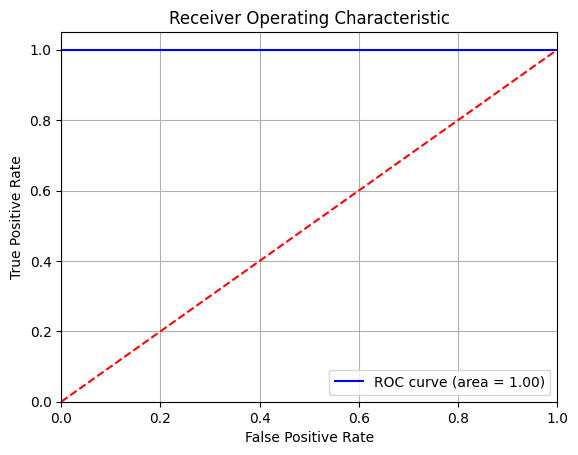

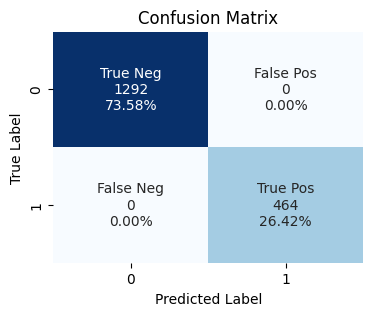

-----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1292
           1       1.00      1.00      1.00       464

    accuracy                           1.00      1756
   macro avg       1.00      1.00      1.00      1756
weighted avg       1.00      1.00      1.00      1756

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}


In [374]:
random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
}

random_forest_evaluation, best_random_forest_params = Algorithm(
    model=RandomForestClassifier(),
    X_train=X_train_sent_scaled,
    X_test=X_test_sent_scaled,
    y_train=y_train_resampled,
    y_test=y_test_sent,
    params=random_forest_params, save=True, name="Churn_Sentiment_Classifier"
)

print("Best Parameters:", best_random_forest_params)

# **Further Validation:**
   - You might consider using cross-validation to assess the model's performance on multiple splits of the data, which can provide a more reliable estimate of its generalizability.

## Apply Cross-Validation:
- Use cross-validation to evaluate the model's performance:

In [375]:
model = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=10, random_state=2024)
cv_scores = cross_val_score(model, X_train_sent_scaled, y_train_resampled, cv=5, scoring='accuracy')

In [376]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Standard Deviation of Cross-Validation Accuracy: 0.0


# Evaluate on the Test Set:
After cross-validation, you can fit the model on the training data and evaluate it on the test set:

In [377]:
model.fit(X_train_sent_scaled, y_train_resampled)
test_accuracy = model.score(X_test_sent_scaled, y_test_sent)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 1.0


# Confusion Matrix:

In [378]:
y_pred = model.predict(X_test_sent_scaled)
cm = confusion_matrix(y_test_sent, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test_sent, y_pred))

Confusion Matrix:
 [[1292    0]
 [   0  464]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1292
           1       1.00      1.00      1.00       464

    accuracy                           1.00      1756
   macro avg       1.00      1.00      1.00      1756
weighted avg       1.00      1.00      1.00      1756



# Additional Evaluation Metrics:

In [379]:
roc_auc = roc_auc_score(y_test_sent, model.predict_proba(X_test_sent_scaled)[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0
